In [3]:
import numpy as np
import pandas as pd
import ast
import math
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
from datasets import load_dataset
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
from matplotlib.ticker import PercentFormatter


In [4]:
# Load the dataset from the CSV file
dataset = load_dataset('csv', data_files=r'C:\Users\lahms\OneDrive\Documents\Sam - Data Analyst\data_jobs.csv')

# Convert the dataset to a pandas DataFrame
df = dataset['train'].to_pandas()

# Data Cleaning: Convert the 'job_posted_date' to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
# Show the first few rows of the DataFrame to check the results
df


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [5]:
df_Spain_DA = df [(df ['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Spain')].copy()


In [6]:
df_Spain_DA = df_Spain_DA.dropna (subset = ['salary_year_avg'])
df_Spain_DA_exploded = df_Spain_DA.explode ('job_skills')
df_Spain_DA_exploded [['salary_year_avg', 'job_skills']].head(10)

,salary_year_avg,job_skills
17710,51014.0,None
32177,111175.0,sql
32177,111175.0,python
32177,111175.0,r
32177,111175.0,databricks
32177,111175.0,pandas
32177,111175.0,numpy
32177,111175.0,matplotlib
32177,111175.0,scikit-learn
32177,111175.0,airflow


In [7]:
df_Spain_skills = df_Spain_DA_exploded.groupby ('job_skills')['salary_year_avg'].agg (['count','median']).sort_values (by = 'count', ascending = False)


In [8]:
df_Spain_skills = df_Spain_DA_exploded.groupby ('job_skills')['salary_year_avg'].agg (['count','median']).sort_values (by = 'count', ascending = False)

df_Spain_skills = df_Spain_skills.rename (columns= {'count': 'skill_count', 'median': 'median_salary'})

df_Spain_skills

,skill_count,median_salary
job_skills,,
sql,17,89100.0
python,14,98500.0
tableau,9,98500.0
excel,5,72900.0
power bi,4,73352.0
pandas,4,108087.5
looker,4,111175.0
airflow,3,98500.0
jupyter,3,105000.0


In [9]:
df_Spain_skills = df_Spain_DA_exploded.groupby ('job_skills')['salary_year_avg'].agg (['count','median']).sort_values (by = 'count', ascending = False)

df_Spain_skills = df_Spain_skills.rename (columns= {'count': 'skill_count', 'median': 'median_salary'})

Spain_DA_job_count = len(df_Spain_DA)
df_Spain_skills ['skill_percent'] = df_Spain_skills ['skill_count']/ Spain_DA_job_count * 100
df_Spain_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,17,89100.0,56.666667
python,14,98500.0,46.666667
tableau,9,98500.0,30.000000
excel,5,72900.0,16.666667
power bi,4,73352.0,13.333333
pandas,4,108087.5,13.333333
looker,4,111175.0,13.333333
airflow,3,98500.0,10.000000
jupyter,3,105000.0,10.000000


In [10]:
df_Spain_skills = df_Spain_DA_exploded.groupby ('job_skills')['salary_year_avg'].agg (['count','median']).sort_values (by = 'count', ascending = False)

df_Spain_skills = df_Spain_skills.rename (columns= {'count': 'skill_count', 'median': 'median_salary'})

Spain_DA_job_count = len(df_Spain_DA)
df_Spain_skills ['skill_percent'] = df_Spain_skills ['skill_count']/ Spain_DA_job_count * 100
skill_percent = 5
df_Spain_skills_high_demand = df_Spain_skills [df_Spain_skills['skill_percent'] > skill_percent]
df_Spain_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,17,89100.0,56.666667
python,14,98500.0,46.666667
tableau,9,98500.0,30.000000
excel,5,72900.0,16.666667
power bi,4,73352.0,13.333333
pandas,4,108087.5,13.333333
looker,4,111175.0,13.333333
airflow,3,98500.0,10.000000
jupyter,3,105000.0,10.000000


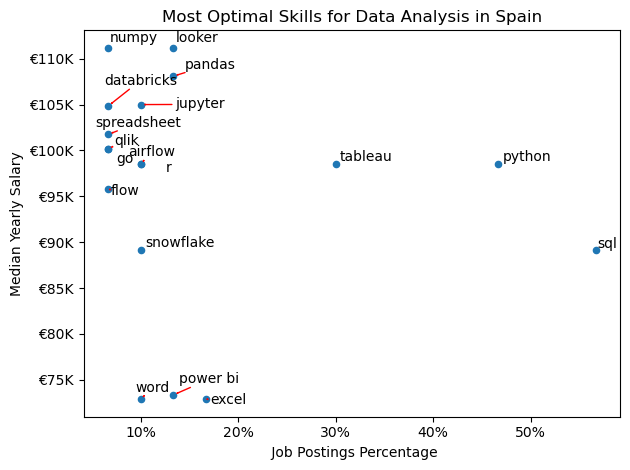

In [11]:

# Plot the scatter plot
df_Spain_skills_high_demand.head(20).plot(kind='scatter', x='skill_percent', y='median_salary')
#plt.scatter (df_Spain_skills_high_demand
# ['skill_percent'], df_Spain_skills_high_demand 
# ['median_salary'])

plt.xlabel(' Job Postings Percentage')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysis in Spain')

# Format y-axis as currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'€{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

texts = []
# Annotate points
for i, txt in enumerate(df_Spain_skills_high_demand.head(20).index):
    texts.append (plt.text(df_Spain_skills_high_demand['skill_percent'].iloc[i], df_Spain_skills_high_demand['median_salary'].iloc[i], txt))
adjust_text (texts, arrowprops=dict(arrowstyle='->', color='red', lw=1))
x = df_Spain_skills_high_demand['skill_percent'].iloc[i]
y = df_Spain_skills_high_demand['median_salary'].iloc[i]

plt.tight_layout()
plt.show()

In [12]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict [key] += value
        else:
            technology_dict[key] = value
for key, value in technology_dict.items():
    technology_dict [key] = list (set(value))

technology_dict

{'analyst_tools': ['excel',
  'qlik',
  'sheets',
  'dax',
  'esquisse',
  'alteryx',
  'spreadsheet',
  'visio',
  'datarobot',
  'microstrategy',
  'ssis',
  'msaccess',
  'outlook',
  'sas',
  'ms access',
  'powerbi',
  'word',
  'spss',
  'looker',
  'powerpoint',
  'cognos',
  'tableau',
  'sharepoint',
  'power bi',
  'nuix',
  'splunk',
  'ssrs',
  'sap'],
 'programming': ['pascal',
  'powershell',
  'julia',
  'delphi',
  'python',
  'solidity',
  'mongodb',
  'go',
  'erlang',
  'sass',
  'clojure',
  'crystal',
  'scala',
  'vb.net',
  'matlab',
  'elixir',
  'visualbasic',
  'kotlin',
  'dart',
  'sql',
  'mongo',
  'vba',
  'typescript',
  'c++',
  'shell',
  'perl',
  'golang',
  'groovy',
  'objective-c',
  'bash',
  'sas',
  'cobol',
  'ruby',
  'r',
  'c',
  'css',
  'haskell',
  'lua',
  'php',
  'visual basic',
  'swift',
  't-sql',
  'java',
  'fortran',
  'ocaml',
  'f#',
  'html',
  'assembly',
  'apl',
  'lisp',
  'c#',
  'no-sql',
  'nosql',
  'javascript',
  'r

In [13]:
pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])

,technology,skills
0,analyst_tools,"[excel, qlik, sheets, dax, esquisse, alteryx, ..."
1,programming,"[pascal, powershell, julia, delphi, python, so..."
2,cloud,"[oracle, ibm cloud, heroku, gcp, aurora, bigqu..."
3,libraries,"[tidyr, nltk, huggingface, rshiny, scikit-lear..."
4,other,"[codecommit, puppet, unreal, unity, jenkins, t..."
5,databases,"[elasticsearch, redis, cassandra, neo4j, dynam..."
6,os,"[ubuntu, fedora, debian, linux, suse, arch, ma..."
7,async,"[asana, monday.com, wrike, airtable, notion, d..."
8,webframeworks,"[fastify, symfony, angular.js, node, asp.net c..."
9,sync,"[microsoft teams, symphony, zoom, ringcentral,..."


In [14]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,excel
0,analyst_tools,qlik
0,analyst_tools,sheets
0,analyst_tools,dax
0,analyst_tools,esquisse
...,...,...
9,sync,wire
9,sync,webex
9,sync,slack
9,sync,twilio


In [15]:
df_Spain_skills_high_demand.merge(df_technology, left_on = 'job_skills', right_on = 'skills')

,skill_count,median_salary,skill_percent,technology,skills
0,17,89100.0,56.666667,programming,sql
1,14,98500.0,46.666667,programming,python
2,9,98500.0,30.000000,analyst_tools,tableau
3,5,72900.0,16.666667,analyst_tools,excel
4,4,73352.0,13.333333,analyst_tools,power bi
5,4,108087.5,13.333333,libraries,pandas
6,4,111175.0,13.333333,analyst_tools,looker
7,3,98500.0,10.000000,libraries,airflow
8,3,105000.0,10.000000,libraries,jupyter
9,3,89100.0,10.000000,cloud,snowflake


In [16]:
df_plot = df_Spain_skills_high_demand.merge(df_technology, left_on = 'job_skills', right_on = 'skills')

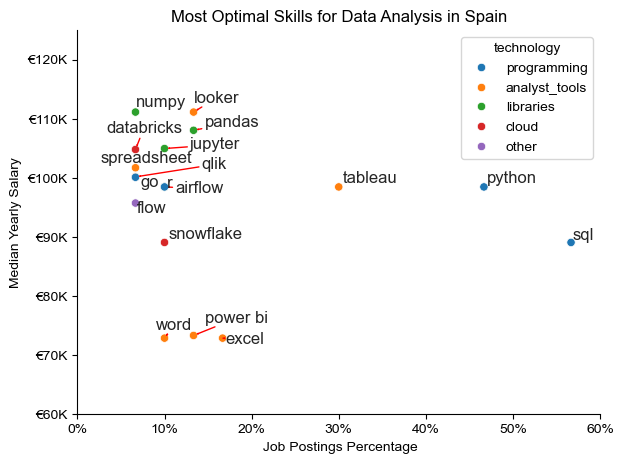

In [17]:
#def currency_format(x, _):
#    return f"€{x:,.0f}"  # Formats as $xx,xxx with no decimals

# Plot the scatter plot
#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data = df_plot,
    x = 'skill_percent',
    y = 'median_salary',
    hue = 'technology'
)
sns.despine()
sns.set_theme (style = 'ticks')
plt.xlim(0,60)
plt.ylim(60000, 125000)
plt.xlabel(' Job Postings Percentage')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysis in Spain')

# Format y-axis as currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'€{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

texts = []
# Annotate points
for i, txt in enumerate(df_Spain_skills_high_demand.head(20).index):
    texts.append (plt.text(df_Spain_skills_high_demand['skill_percent'].iloc[i], df_Spain_skills_high_demand['median_salary'].iloc[i], txt))
adjust_text (texts, arrowprops=dict(arrowstyle='->', color='red', lw=1))
x = df_Spain_skills_high_demand['skill_percent'].iloc[i]
y = df_Spain_skills_high_demand['median_salary'].iloc[i]


plt.tight_layout()
plt.show()